# Pràctica 2 - OCR de Nombres
## Intel·ligència Artficial
### Autors:
- Jordi Florit Ensenyat
- Pau Girón Rodríguez
### Descripció:
Es demana fer un reconèixedor de nombres escrits a mà. Partim del dataset de dígits 'load_digits'de la llibreria 'sklearn's Aquest dataset conté 1797 mostres (aproximadament 180 de cada digit) , on cada mostra es una imatge en una escala de grisos de 8x8 píxels (vectoritzar en un vector de 64 posicions) on el valor de cada pixel esta dins el rang 0 (negre) - 16 (blanc), cada una de aquestes mostres representa un dígit del 0-9 i esta asociat a una etiqueta corresponent que indica el número que representa la imatge. Llavonces la pràctica consistirà en realitzar tres parts diferents:
* **Exercici 1**: Comparació del rendiments dels quatre models emprats: regressió logística, perceptró, arbre de decisió i bosc aleatori.
* **Exercici 2**: Comparació amb el dataset UCI Machine learning.2.l

# Part 1
Configuració del entorn,introduir els imports de les diferents llibreries de Python que utilitzarem:

In [1]:
# Descomentar la seguent linea per instalar seaborn al entorn de Python. Una vegada instalat es pot tornar a comentar
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Part 2
Carregam l'objecte *digits* retornat per *load_digits*. Aquest objecte conté diferents atributs entre els que destaquen:
* data: Matriu de (n_samples, n_features) que contenen les caraacterístiques de entrada. Cada fila correspon a una imatge de 8x8 píxels aplanada en una array de longitud 64.
* target: Es un array de longitud n_samples que conté les etiquetes o classes de les imátges. En aquest cas va de 0-9
* target_names: Array que conté el nombre únic de les etiquetes.
* images: Matriu de (n_samples,8, 8) que conté les imatges originals. El mateix que data però amb fortmat de matriu 2D per cada imatge.
* DESCR: Cadena de text que conte una descripció completa del conjunt de dades.

Dimensions de les dades: (1797, 64)
Nombre de etiquetes: 10


<function matplotlib.pyplot.show(close=None, block=None)>

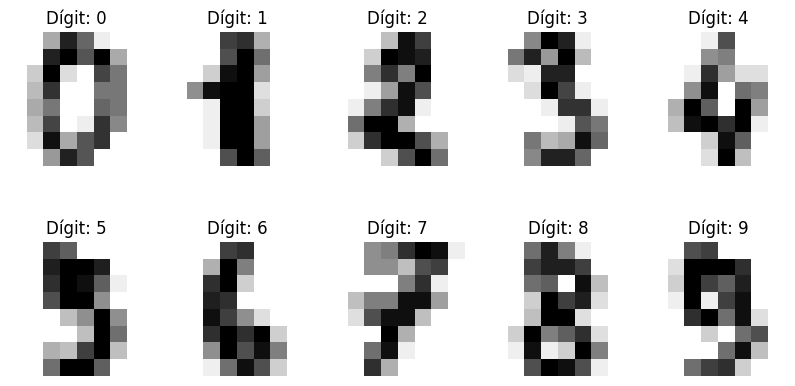

In [2]:
# Cargar el dataset
digits = load_digits()

# Acceder a los datos y las etiquetas
data = digits.data  # Obtener los datos de las imágenes
target = digits.target  # Obtener las etiquetas (números que representan)

# Mostrar alguna informació sobre el dataset
print(f"Dimensions de les dades: {data.shape}")  # Muestra la forma de los datos (número de muestras, número de características)
print(f"Nombre de etiquetes: {len(digits.target_names)}")  # Muestra el número de etiquetas únicas (números de 0 a 9)
# Visualitzar un exemple de cada classe
fig, axes = plt.subplots(2,5,figsize=(10,5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Dígit: %i' %label)
plt.show



Ara dividim les dades en conjunts de entrenament i proves. Els parametres que se han indicat son (A mes introduim les dades y les etiquetes de cada imatge ja separats preaviaments com **data** i **targets**):
* **test_size=0.33** Determina la proporcio del conjunt original que s'utilitzara com conjunt de proves en aquest cas. 33% proves i 67%      entrenament:
* **random_state=42** Aquest parametre determina la reproducibilitat dels resultats, establint una *seed* per el generador de nombres aleatoris (aquest nombre 42 podria ser qualsevol enter)

El que ens retorna la funció son 4 arrays:
* X_train: Les dades de entrenament. Es un subconjunt de **data** seleccioant aleatoriament depenent dels parametres anteriors mencionats, en aquest cas un 77% de **data**
* X_test: Son les dades de proves. Es el complementari de X_train.
* y_train i y_test: Son les etiquetes corresponents a cada dada dins els arrays X_train i X_test.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1203, 64), (594, 64), (1203,), (594,))

# Exercici Dificultat C
Comparació dels rendiment dels models:
* Regressor logístic
* Perceptró
* Arbre de decisió
* Bosc aleatori

## Regressor logístic
Cream el model i indicam els paràmetres necesaris mes relevants.
- `multi_class='multinomial'`: Aquest paràmetre s'utilitza quan les etiquetes són més de dues (és a dir, multiclasse).

- `solver='lbfgs'`: Aquest paràmetre especifica l'algorisme a utilitzar en el problema d'optimització. 'lbfgs' és un optimitzador a la família de mètodes quasi-Newtonians.

- `max_iter=10000`: Aquest paràmetre defineix el nombre màxim d'iteracions quan s'ajusta el model.


In [4]:
#Crear el model
log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

#Entrenar el model
log.fit(X_train, y_train)

#Fer les prediccions
y_pred = log.predict(X_test)

#Calcular la precisió del model
accuracy = accuracy_score(y_test, y_pred)
print("Classification report: \n", classification_report(y_test, y_pred))                        
print(f'Precisió del model: {accuracy}')

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

Precisió del model: 0.9730639730639731


<function matplotlib.pyplot.show(close=None, block=None)>

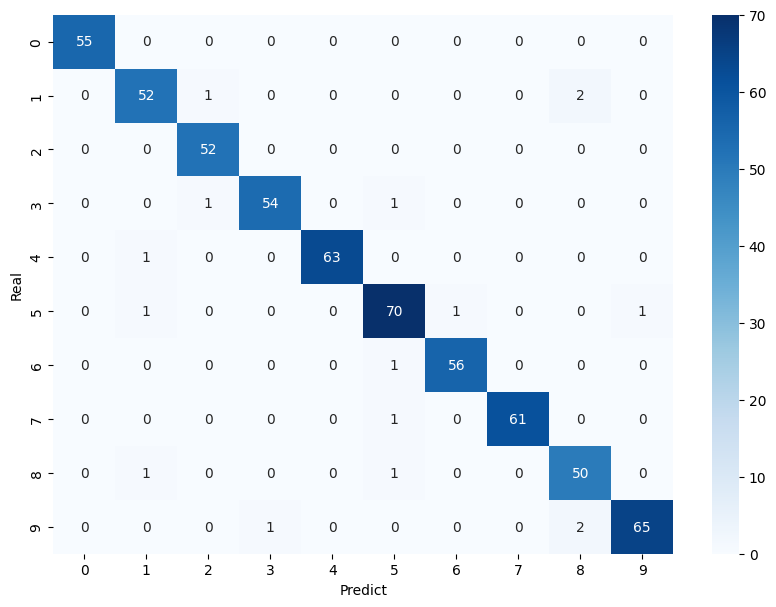

In [5]:
# Crear la matriu de confusió
cm =  confusion_matrix(y_test, y_pred)

#Visualitzar la matriu
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show

## Perceptron

El model utilitzat es el _Perceptron_ de una sola capa proporcionat per la biblioteca scikit_learn, primer cream el model i indicam els parametres necesaris per la seva creacio. Els parametres modificats son:

- **max_iter=1000**: Aquest paràmetre defineix el nombre màxim de passades sobre les dades d'entrenament (també conegudes com a èpoques). He establert aquest valor el 1000 per permetre que l'algorisme tingui prou iteracions per convergir cap a una solució òptima.

- **tol=1e-3**: Aquest és el criteri de parada. Si no s'observen millores en la precisió del model per un valor de `1e-3` durant les darreres èpoques, aleshores l'algorisme s'aturarà i es considerarà que ha convergit. Es a dir se especifica la tolerància per a l'optimització. Si la diferència entre la funció de cost en dues iteracions consecutives és menor que la tolerància, l'optimització s'aturarà.

- **random_state=42**: Aquest paràmetre s'utilitza per a la inicialització aleatòria dels pesos. En establir una llavor fixa (en aquest cas 42), ens assegurem que els resultats siguin reproduïbles.

In [6]:
# Crear el modelo
perc = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Entrenar el modelo
perc.fit(X_train, y_train)

# Hacer las predicciones
y_pred = perc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Classification report: \n", classification_report(y_test, y_pred))                        
print(f'Precissió del model: {accuracy}')




Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      0.82      0.88        55
           2       0.94      0.98      0.96        52
           3       0.92      0.96      0.94        56
           4       0.98      0.97      0.98        64
           5       0.99      0.96      0.97        73
           6       1.00      0.98      0.99        57
           7       1.00      0.94      0.97        62
           8       0.75      0.98      0.85        52
           9       0.97      0.90      0.93        68

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

Precissió del model: 0.9478114478114478


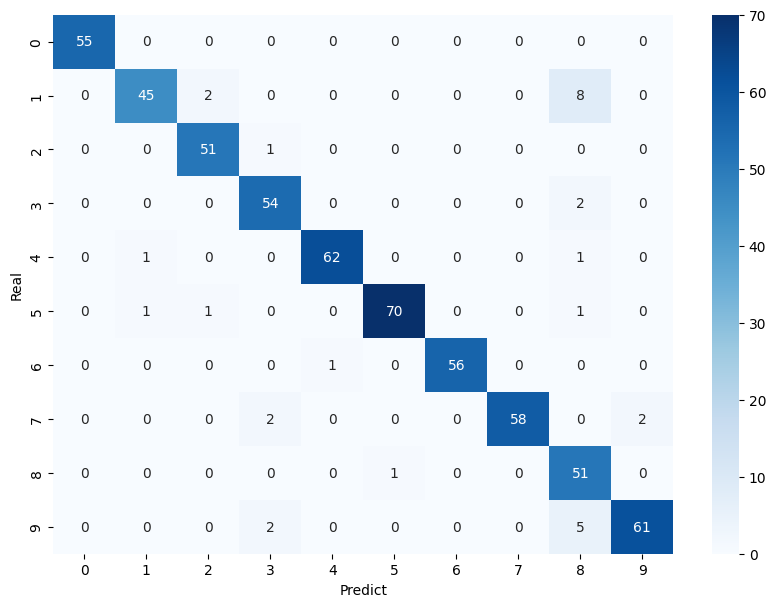

In [7]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

## Arbre de decisió
A continuació s'emprarà el model d'arbre de decisió 'DecisionTreeClasifier', es crea primerament el model i especificam els paràmetres per la crida a la respectiva funció:
- **criterion='gini'**: Gini mesura què tan sovint un element seleccionat aleatòriament seria incorrectament classificat. Gini és el criteri predeterminat per 'DecisionTreeClasifier' i a més te resultats semblants a entropía.
- **max_depth=15**: especifica la profunditat de l'arbre i com més profund sigui pot ajudar a captar més patrons entre les dades.
- **min_samples_split=10**: nombre mínim de mostres per dividir un node intern. Amb el valor de '10' ens asseguram que no hi hagi divisions que s'adaptin a variacions petites.
- **min_samples_leaf=5**: nombre mínim de mostres per estar a un node fulla. Com més major és aquest valor, més es generalitza i suavitza el model.

In [8]:
# Crear una instància del classificador del model de decisió
tree_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Entrenar el model
tree_classifier.fit(X_train, y_train)

# Realitzar prediccions
y_pred = tree_classifier.predict(X_test)

# Calcular la precissió del model
accuracy_tree = accuracy_score(y_test, y_pred)
print("Classification report (Arbre de Decisió): \n", classification_report(y_test, y_pred))
print(f'Precisió del model (Arbre de Decisió): {accuracy_tree}')


Classification report (Arbre de Decisió): 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.74      0.71      0.72        55
           2       0.81      0.81      0.81        52
           3       0.88      0.82      0.85        56
           4       0.75      0.81      0.78        64
           5       0.89      0.89      0.89        73
           6       0.93      0.93      0.93        57
           7       0.82      0.90      0.86        62
           8       0.76      0.81      0.79        52
           9       0.84      0.78      0.81        68

    accuracy                           0.84       594
   macro avg       0.84      0.84      0.84       594
weighted avg       0.84      0.84      0.84       594

Precisió del model (Arbre de Decisió): 0.8417508417508418


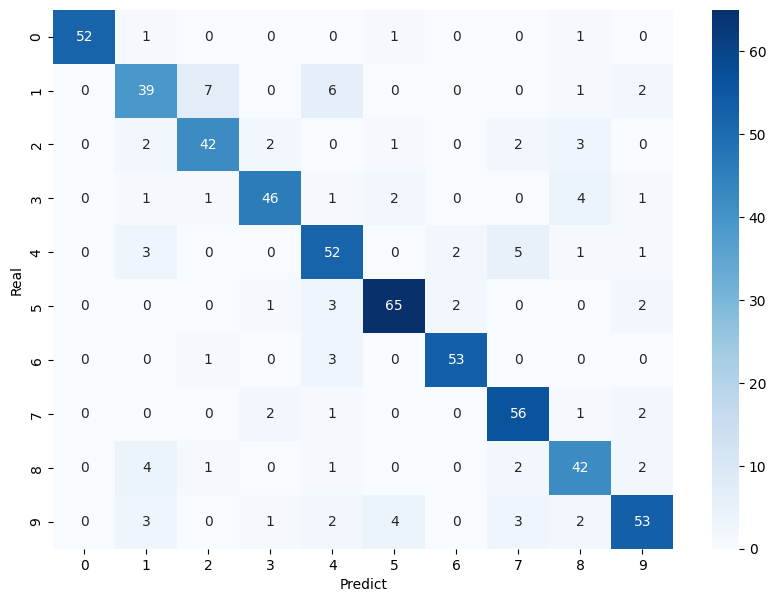

In [9]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

# Random Forest
A la biblioteca scikit-learn, s'usa la classe RandomForestClassifier per implementar un classificador de bosc aleatori. Usarem una sèrie de paràmetres que ens permetran personalitzar el comportament del model:
- **n_estimators=100**: nombre d'arbres al bosc. Un nombre més gran d'arbres generalment pot millorar la generalització del model, però també augmenta el cost computacional. 100 és un valor comunament utilitzat i pot proporcionar un bon equilibri.
- **max_depth=10**: limitam a 10 la profunditat de l'arbre. Així evitam arbres massa complexos i un cost computacional innecessari.
- **min_samples_split=2,min_samples_leaf=1**: estableixen el nombre mínim de mostres requerides per dividir un node intern i el nombre mínim de mostres requerides per ser una fulla, respectivament. Mantenir aquests valors baixos permet que el model capturi patrons més fins.

In [10]:
# Crear model RandomForestClassifier
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42 
)

# Entrenar el model
random_forest_classifier.fit(X_train, y_train)

# Fer prediccions
y_pred = random_forest_classifier.predict(X_test)

# Càlcul de la precissió
accuracy = accuracy_score(y_test, y_pred)
print("Classification report: \n", classification_report(y_test, y_pred))
print(f'Precissió del model (Random Forest): {accuracy}')

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.93      1.00      0.96        55
           2       1.00      1.00      1.00        52
           3       1.00      0.95      0.97        56
           4       0.97      1.00      0.98        64
           5       0.96      0.95      0.95        73
           6       0.98      0.98      0.98        57
           7       0.95      1.00      0.98        62
           8       0.94      0.94      0.94        52
           9       0.98      0.93      0.95        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

Precissió del model (Random Forest): 0.9713804713804713


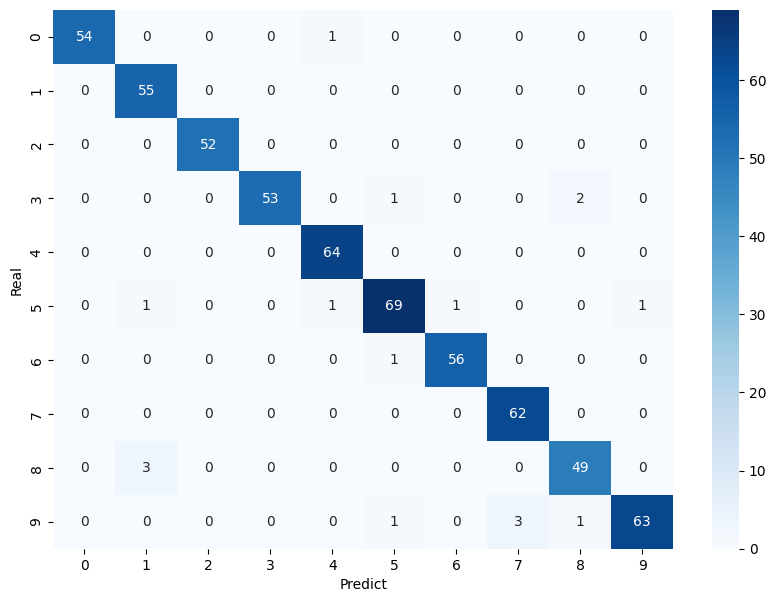

In [11]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

GENERAL A TOTS ELS MODELS:
A la matriu de confusió, el que presenta a la diagonal principal son les dades que el model ha acertat correctament de cada classe. Per altra banda els valors fora de la diagonal representen les prediccions incorrectes, per exemple si a la columna 2 hi ha un valor a la fila 5 significa que el model ha predict un 2 quan realment era un 5.

# Exercici Dificultat B
En aquest exercici farem la comparació de rendiment dels models anteriors amb el data set proporcionat del repositori UCI Machine learning. Dividim l'exercici en dues parts diferents.

1. Mirar si canvien els resultats del exercici 1 aplicant dades no empreades a aprenentatge ni a test.
2. Intentar millorar els resultats re-aprenent els models amb nous conjunts d'aprenentage, test i validació empreant el mètode `k-fold crossvalidation` per triar el millor model.

## Part 1
### Obtenir el nou conjunt de dades i procesarles
Per obtenir el nou conjunt de dades, el descarregam desde el repositori de UCI Machine Learning, l'afegim al projecte i l'importam amb la llibreria pandas per la manipulacio de dades.

In [12]:
import pandas as pd

# URL del conjunto de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra'

# Cargamos el conjunto de datos en un DataFrame de pandas
datos = pd.read_csv(url, header=None)

# Visualiza las primeras 5 filas del DataFrame
print(datos.head())

   0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
0   0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1   
1   0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
2   0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
3   0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
4   0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   

   62  63  64  
0   0   0   0  
1   0   0   0  
2   0   0   7  
3   0   0   4  
4   0   0   6  

[5 rows x 65 columns]


Amb un exemple de com es el data set, podem veure clarament que cada fila representa una imatge d'un dígit escrit a mà i cada columna representa un píxel de la imatge. Els valors són la intensitat del píxel (entre 0 i 16). La darrera columna ('64') és l'etiqueta del dígit representat per la imatge. 

In [13]:
# La última columna es la etiqueta (el dígito), así que la separamos del resto
X_nuevo = datos.drop(64, axis=1)
y_nuevo = datos[64]

Les dades proporcionades per el data set estan suficientment preparades per ser utilitzades ja que utlitzen el mateix format que hem empleat anteriorment per entrenar i evaluar els models. Per tant el que feim es separar les dades.
* X: Aquesta variable conté les dades de entrada, es a dir represente els dígits escrits a mà amb el format anteiorment mencionat.
* y: Guardam les etiquetes corresponent a cada dada de entrada. Les etiquetes (0-9) de cada imatge de X.

### Aplicar els models a les noves dades
Emplearem els models anteriorment entrenats per fer prediccions al nou conjunt de dades.
#### Regressor logistic

In [14]:
# Hacer las predicciones
y_pred_nuevo = log.predict(X_nuevo)

# Calcular la precisión del modelo
accuracy_nuevo = accuracy_score(y_nuevo, y_pred_nuevo)
print("Classification report: \n", classification_report(y_nuevo, y_pred_nuevo))                        
print(f'Precisión del modelo en los nuevos datos: {accuracy_nuevo}')

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       376
           1       0.92      0.93      0.93       389
           2       0.97      0.96      0.96       380
           3       0.93      0.97      0.95       389
           4       0.95      0.90      0.92       387
           5       0.96      0.87      0.91       376
           6       0.94      0.98      0.96       377
           7       0.95      0.98      0.97       387
           8       0.94      0.89      0.91       380
           9       0.87      0.92      0.90       382

    accuracy                           0.94      3823
   macro avg       0.94      0.94      0.94      3823
weighted avg       0.94      0.94      0.94      3823

Precisión del modelo en los nuevos datos: 0.940099398378237
